In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn.linear_model import Perceptron

# Binary Classification

## Problem A

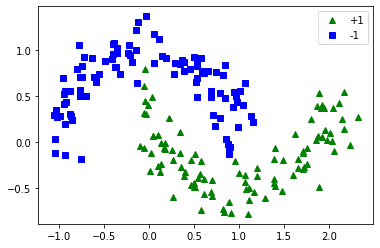

In [2]:
# load data
file = "halfmoon.csv"
df = pd.read_csv(file, header=0).iloc[:,1:].rename(columns={'X1': 0, 'X2': 1, 'Y': 2})
X = df.loc[:,0:1]
Y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][Y == 1],X[1][Y == 1], 'g^', label='+1')
plt.plot(X[0][Y == 0],X[1][Y == 0], 'bs', label='-1')
plt.legend()

plt.show()

## Problem B

In [3]:
# create Perceptron model
clf = Perceptron(random_state=0)

# train model on dataset
clf.fit(X,Y)

# coefficient of determination of the prediction
print("E_in:\t\t", 1-clf.score(X,Y))
print("Weights:\t", clf.coef_)
print("Bias:\t\t", clf.intercept_)

E_in:		 0.125
Weights:	 [[ 0.8132967  -3.91517525]]
Bias:		 [1.]


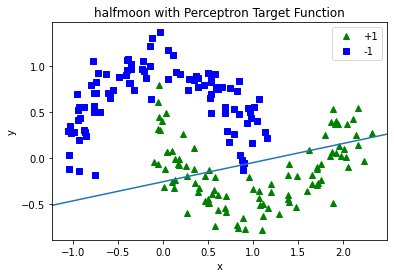

In [4]:
# plot dataset
plt.plot(X[0][Y == 1],X[1][Y == 1], 'g^', label='+1')
plt.plot(X[0][Y == 0],X[1][Y == 0], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv') + ' with Perceptron Target Function')
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot generated target function/decision boundary
target_function = np.append(clf.coef_[0], clf.intercept_[0])
slope = -target_function[0] / target_function[1]
intercept = target_function[2] / target_function[1]
Y_new = [slope * i + intercept for i in xlim]
plt.plot(xlim, Y_new)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

## Problem C

In [5]:
training_set = df.sample(frac=0.8, random_state=1)
train_X, train_Y = training_set.loc[:,0:1], training_set.loc[:,2]
testing_set = df.copy().drop(training_set.index)
test_X, test_Y = testing_set.loc[:,0:1], testing_set.loc[:,2]

In [6]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# create Perceptron model
clf = Perceptron(max_iter=1, random_state=0)

# train model on dataset
clf.fit(train_X,train_Y,coef_init=np.zeros((1,2)), intercept_init=np.zeros((1,)))
best_model = deepcopy(clf)
min_ein = 1 - clf.score(X,Y)

for _ in range(1000):
    clf.fit(train_X,train_Y,coef_init=best_model.coef_, intercept_init=best_model.intercept_)
    new_ein = 1 - clf.score(train_X,train_Y)
    if new_ein < min_ein:
        best_model = deepcopy(clf)
        min_ein = new_ein
    
print("E_in:\t\t", 1-best_model.score(train_X,train_Y))
print("E_test:\t\t", 1-best_model.score(test_X,test_Y))
print("Weights:\t", best_model.coef_)
print("Bias:\t\t", best_model.intercept_)

E_in:		 0.41874999999999996
E_test:		 0.42500000000000004
Weights:	 [[ 0.89064142 -1.76178731]]
Bias:		 [2.]


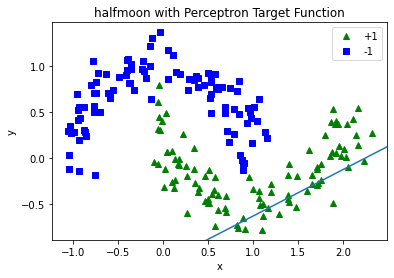

In [7]:
# plot dataset
plt.plot(X[0][Y == 1],X[1][Y == 1], 'g^', label='+1')
plt.plot(X[0][Y == 0],X[1][Y == 0], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv') + ' with Perceptron Target Function')
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot generated target function/decision boundary
target_function = np.append(best_model.coef_[0], best_model.intercept_[0])
slope = -target_function[0] / target_function[1]
intercept = target_function[2] / target_function[1]
Y_new = [slope * i + intercept for i in xlim]
plt.plot(xlim, Y_new)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [8]:
# 95% Confidence > delta = 1 - 0.95 = 0.05
ci = 0.95
delta = 1 - ci
print("Error Probability w/ Hoeffding Inequality for 95% Confidence on ", len(testing_set)," samples:\t", np.sqrt(-np.log(delta/2)/(2*len(testing_set))))

Error Probability w/ Hoeffding Inequality for 95% Confidence on  40  samples:	 0.21473470417336876


# Linear Regression 1

In [9]:
## Problem A

In [10]:
df = pd.read_csv("auto-mpg.data.txt", header=None, delim_whitespace=True)
df = df.loc[:,[0,2,3,4,5]].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
df.insert(1,1,1)

training_set = df.sample(frac=0.8, random_state=1).reset_index()
training_set.pop('index')
train_X, train_Y = training_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), training_set.loc[:,0]
testing_set = df.copy().drop(training_set.index).reset_index()
testing_set.pop('index')
test_X, test_Y = testing_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), testing_set.loc[:,0]

In [11]:
def analytical_linear_regression(x,y):
    xt = np.transpose(x)
    return np.linalg.inv(xt @ x) @ xt @ y

w = analytical_linear_regression(train_X,train_Y)
print(w)

0    44.206556
1    -0.006523
2    -0.034624
3    -0.005561
4     0.050176
dtype: float64


In [12]:
def sample_error(w, X, y):
    N = len(X)
    Xt = np.transpose(X)
    yt = np.transpose(y)
    wt = np.transpose(w)
    first = wt @ Xt @ X @ w
    second = 2*(wt @ Xt @ y)
    last = yt @ y
    return (first - second + last)/N

print("E_in:\t", sample_error(w,train_X,train_Y))
print("E_test:\t", sample_error(w,test_X,test_Y))

E_in:	 18.37312607698431
E_test:	 36.27903771855781


## Problem B

In [13]:
e_in = []
e_test = []
for i in range(50):
    print("Iteration ", i)
    training_set = df.sample(frac=0.8).reset_index()
    training_set.pop('index')
    train_X, train_Y = training_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), training_set.loc[:,0]
    testing_set = df.copy().drop(training_set.index).reset_index()
    testing_set.pop('index')
    test_X, test_Y = testing_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), testing_set.loc[:,0]
    
    w = analytical_linear_regression(train_X,train_Y)
    e_in.append(sample_error(w,train_X,train_Y))
    e_test.append(sample_error(w,test_X,test_Y))
    print("\tE_in:\t", e_in[i])
    print("\tE_test:\t", e_test[i])
print("---")
print("E_in Variance:\t\t", np.var(e_in))
print("E_test Variance:\t", np.var(e_test))

Iteration  0
	E_in:	 17.719599161653925
	E_test:	 36.412474057805596
Iteration  1
	E_in:	 17.975498699065284
	E_test:	 40.78302137221799
Iteration  2
	E_in:	 17.491224352088054
	E_test:	 37.26698499516169
Iteration  3
	E_in:	 18.117586845155998
	E_test:	 37.43164759747888
Iteration  4
	E_in:	 18.620180839383753
	E_test:	 36.874293871290135
Iteration  5
	E_in:	 16.57753544611208
	E_test:	 39.80259030037014
Iteration  6
	E_in:	 17.68902631167609
	E_test:	 37.626600471419444
Iteration  7
	E_in:	 15.881833358438804
	E_test:	 41.29454588792578
Iteration  8
	E_in:	 17.85199848945231
	E_test:	 38.106459262503996
Iteration  9
	E_in:	 18.473478791662057
	E_test:	 39.049286651665895
Iteration  10
	E_in:	 17.695225630430436
	E_test:	 37.25193216124971
Iteration  11
	E_in:	 18.621327321294956
	E_test:	 37.04744696576618
Iteration  12
	E_in:	 18.76174123137977
	E_test:	 35.55912739483792
Iteration  13
	E_in:	 18.974131275200026
	E_test:	 36.46904188223307
Iteration  14
	E_in:	 17.473721201285944
	E

## Problem C

In [14]:
def LMS(X, y, iterations=100, u=0.2):
    w = np.zeros([len(X[0]),])
    Xt = np.transpose(X)

    for i in range(iterations):
        print(w)
        w = w - u*((2*Xt @ X @ w) - (2*Xt @ y))/len(X)
        
    return w

print(LMS(train_X.to_numpy(), train_Y.to_numpy(), iterations=10))

[0. 0. 0. 0. 0.]
[9.65849057e+00 1.53011296e+03 8.67515472e+02 2.59286160e+04
 1.55003887e+02]
[-3.02469292e+07 -6.32033227e+09 -3.25440253e+09 -9.47364058e+10
 -4.68006336e+08]
[1.10570651e+14 2.31060164e+16 1.18972438e+16 3.46327958e+17
 1.71082222e+15]
[-4.04213283e+20 -8.44686978e+22 -4.34927713e+22 -1.26607161e+24
 -6.25425516e+21]
[1.47768307e+27 3.08792339e+29 1.58996586e+29 4.62837978e+30
 2.28636895e+28]
[-5.40196810e+33 -1.12885259e+36 -5.81244044e+35 -1.69199745e+37
 -8.35828220e+34]
[1.97479825e+40 4.12674802e+42 2.12485468e+42 6.18543749e+43
 3.05553841e+41]
[-7.21927275e+46 -1.50861586e+49 -7.76783426e+48 -2.26121126e+50
 -1.11701361e+48]
[2.63915057e+53 5.51504914e+55 2.83968827e+55 8.26631321e+56
 4.08346824e+54]
[-9.64794647e+59 -2.01613730e+62 -1.03810524e+62 -3.02191730e+63
 -1.49279406e+61]


# Linear Regression 2

## Problem B

In [15]:
file = "bottle.csv"
df = pd.read_csv(file, header=0)
df.insert(0,'bias', 1)
X = df.loc[:,'Salnty']
Y = df.loc[:,'T_degC']

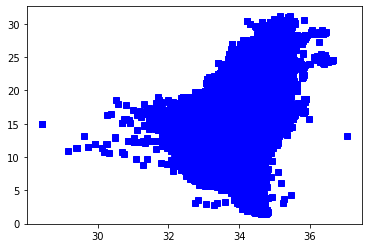

In [16]:
plt.plot(X,Y,'bs')
plt.show()

## Problem C

In [17]:
training_set = df.sample(frac=0.8, random_state=1).reset_index()
training_set.pop('index')
train_X, train_Y = training_set.loc[:,['bias','Salnty']], training_set.loc[:,'T_degC']
testing_set = df.copy().drop(training_set.index).reset_index()
testing_set.pop('index')
test_X, test_Y = testing_set.loc[:,['bias','Salnty']], testing_set.loc[:,'T_degC']

w = analytical_linear_regression(train_X,train_Y)
train_X,trainY = train_X.to_numpy(),train_Y.to_numpy()
test_X,test_Y = test_X.to_numpy(),test_Y.to_numpy()
e_in.append(sample_error(w,train_X,train_Y))
e_test.append(sample_error(w,test_X,test_Y))
print("E_in:\t", e_in[i])
print("E_test:\t", e_test[i])

E_in:	 18.80719674639003
E_test:	 36.148003403432995


# Logistic Regression

In [18]:
def redefine_class(string):
    if string == 'Iris-setosa':
        return 1
    elif string == 'Iris-versicolour':
        return 0
    else:
        return -1

In [19]:
df = pd.read_csv("iris.data.txt", header=None, sep=",")
df[4] = df[4].apply(lambda x: redefine_class(x))
df.insert(0, 'bias', 1)
df = df.rename(columns={'bias': 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5})
print(df)
training_set = df.sample(frac=0.8, random_state=1).reset_index()
training_set.pop('index')
train_X, train_Y = training_set.loc[:,1:4], training_set.loc[:,5]
testing_set = df.copy().drop(training_set.index).reset_index()
testing_set.pop('index')
test_X, test_Y = testing_set.loc[:,1:4], testing_set.loc[:,5]

     0    1    2    3    4  5
0    1  5.1  3.5  1.4  0.2  1
1    1  4.9  3.0  1.4  0.2  1
2    1  4.7  3.2  1.3  0.2  1
3    1  4.6  3.1  1.5  0.2  1
4    1  5.0  3.6  1.4  0.2  1
..  ..  ...  ...  ...  ... ..
145  1  6.7  3.0  5.2  2.3 -1
146  1  6.3  2.5  5.0  1.9 -1
147  1  6.5  3.0  5.2  2.0 -1
148  1  6.2  3.4  5.4  2.3 -1
149  1  5.9  3.0  5.1  1.8 -1

[150 rows x 6 columns]


In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_X,train_Y)
print("E_in:\t", 1-clf.score(train_X,train_Y))

E_in:	 0.0


In [21]:
print("E_in:\t", 1-clf.score(test_X,test_Y))

E_in:	 0.0


In [34]:
print(clf.coef_, clf.intercept_)

[[-6.25344916e-06 -4.47882249e-01  8.11311597e-01 -2.17707962e+00
  -9.21972445e-01]] [6.66365508]


In [22]:
def logistic_regression(x, y, iterations=100):
    w = np.zeros([5,])
    N = len(x)
    for i in range(iterations):
        wt = np.transpose(w)
        exponent = y * wt @ x
        grad = -

SyntaxError: invalid syntax (2060606782.py, line 7)

In [23]:
test = np.zeros([5,1])
testt = np.transpose(test)

In [26]:
# train_X['grad'] = train_X.apply(lambda x: testt @ x, axis=0)
res = []
for i in range(len(train_X)):
    res.append(train_Y[i]*train_X.iloc[i]/(1+np.exp(train_Y[i]*testt @ train_X.iloc[i])))
new_w = -pd.DataFrame(res).sum(axis=0)/len(train_X)

In [35]:
train_X, train_Y

(     0    1    2    3    4
 0    1  5.8  4.0  1.2  0.2
 1    1  5.1  2.5  3.0  1.1
 2    1  6.6  3.0  4.4  1.4
 3    1  5.4  3.9  1.3  0.4
 4    1  7.9  3.8  6.4  2.0
 ..  ..  ...  ...  ...  ...
 115  1  4.6  3.1  1.5  0.2
 116  1  5.8  2.7  5.1  1.9
 117  1  4.8  3.1  1.6  0.2
 118  1  6.5  3.0  5.2  2.0
 119  1  4.9  2.5  4.5  1.7
 
 [120 rows x 5 columns],
 0      1
 1     -1
 2     -1
 3      1
 4     -1
       ..
 115    1
 116   -1
 117    1
 118   -1
 119   -1
 Name: 5, Length: 120, dtype: int64)

In [29]:
pd.DataFrame(res)

,0,1,2,3,4
0,0.5,2.90,2.00,0.60,0.10
1,-0.5,-2.55,-1.25,-1.50,-0.55
2,-0.5,-3.30,-1.50,-2.20,-0.70
3,0.5,2.70,1.95,0.65,0.20
4,-0.5,-3.95,-1.90,-3.20,-1.00
...,...,...,...,...,...
115,0.5,2.30,1.55,0.75,0.10
116,-0.5,-2.90,-1.35,-2.55,-0.95
117,0.5,2.40,1.55,0.80,0.10
118,-0.5,-3.25,-1.50,-2.60,-1.00


In [33]:
-pd.DataFrame(res).sum(axis=0)/len(train_X)

0    0.166667
1    1.260417
2    0.387083
3    1.414167
4    0.531667
dtype: float64